<a href="https://colab.research.google.com/github/SherlyC799/git_work/blob/master/Recommender_System_for_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as p
import numpy as np

In [2]:
import io
from google.colab import files
uploaded = files.upload()
df = p.read_csv(io.BytesIO(uploaded[r'Product Dataset.csv']),encoding='latin-1')
df.head()

Saving Product Dataset.csv to Product Dataset.csv


,id,name,description,price
0,552,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,NaN
1,580,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,$399.00
2,4696,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,$49.00
3,5644,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,NaN
4,6284,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,$158.00


In [3]:
df.columns

Index(['id', 'name', 'description', 'price'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1081 non-null   int64 
 1   name         1081 non-null   object
 2   description  1081 non-null   object
 3   price        418 non-null    object
dtypes: int64(1), object(3)
memory usage: 33.9+ KB


In [5]:
df['price'].fillna(0,inplace=True)

<ipython-input-5-bf2b367e892c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(0,inplace=True)


In [6]:
df.isnull().sum()

,0
id,0
name,0
description,0
price,0


In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
# Ensure consistent data types
df['name'] = df['name'].astype(str)
df['description'] = df['description'].astype(str)
df['price'] = df['price'].astype(str)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['description'] = le.fit_transform(df['description'])
df['price'] = le.fit_transform(df['price'])
df.head()

,name,description,price
0,915,918,166
1,59,59,103
2,913,916,114
3,789,788,166
4,58,58,30


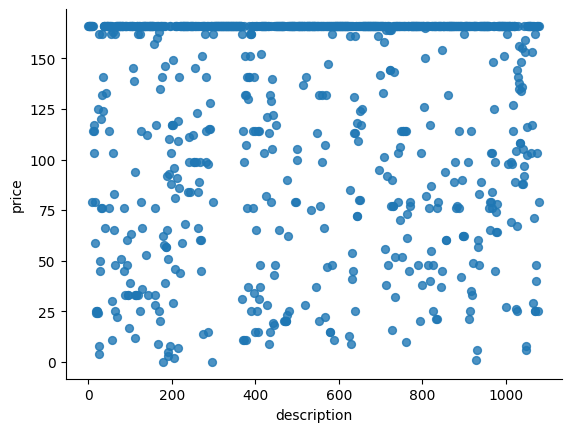

In [10]:
# @title Description vs Price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='description', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
df.describe()

,name,description,price
count,1081.000000,1081.000000,1081.000000
mean,540.000000,540.000000,133.770583
std,312.202125,312.202125,49.822845
min,0.000000,0.000000,0.000000
25%,270.000000,270.000000,103.000000
50%,540.000000,540.000000,166.000000
75%,810.000000,810.000000,166.000000
max,1080.000000,1080.000000,166.000000


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['name', 'description', 'price']] = scaler.fit_transform(df[['name', 'description', 'price']])

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVR
s=SVR()
s.fit(x_train,y_train)

SVR()

In [15]:
y_pred = s.predict(x_test)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE) manually
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.932160800421483
Mean Squared Error: 1.2166631855923484
Root Mean Squared Error: 1.1030245625516906


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the SVC model
svc = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best Estimator: SVR(C=1, gamma=0.1, kernel='sigmoid')


In [18]:
# Predict using the best estimator
y_pred_best = grid_search.best_estimator_.predict(x_test)

# Evaluate the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')



Mean Absolute Error: 0.932160800421483
Mean Squared Error: 1.5627788519828125
Root Mean Squared Error: 1.2501115358170296


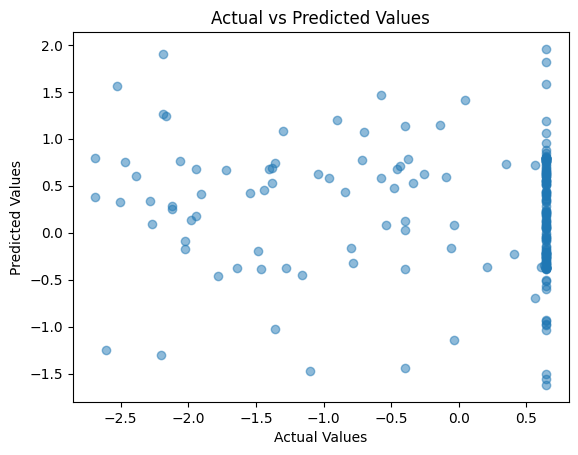

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
